Exploratory Data Analysis (EDA)



Conduct EDA on data from students in portugal to examine relationship between different variables and academic outcomes after semesters 1, 2 and 3. Research consistently shows a strong link between family engaement and student academic success regardless of socio economic status or background. My aim in this project is to examine if this holds true with this data set. 


Hypothesis: Students who have better famliy support and relationships will on average earn better grades and have higher attendance rates. 

Dataset features:

school: Student's school (binary: GP (Gabriel Pereira) or MS (Mousinho da Silveira))

sex: Student's sex (binary: 'F' - female or 'M' - male)

age: Student age (numeric: 15 to 22)

address: Type of student's residential address (binary: 'U' - urban or 'R' - rural)

famsize: Family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3)

Pstatus: Parents' cohabitation status (binary: 'T' - living together or 'A' - separated)

Medu: Mother's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

Fedu: Father's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

Mjob: Mother's job (nominal: teacher, health, services, at_home or Other)

Fjob: Father's job (nominal: teacher, health, services, at_home or Other)

reason: Reason for choosing this school (nominal: home, reputation, course or other)

guardian: Student's guardian (nominal: mother, father or other)

traveltime: Travel time from home to school (time intervals: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour or 4 - >1 hour )

studytime: Weekly study time (time intervals: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours or 4 - >10 hours)

schoolsup: Extra educational support (binary: yes or no)

famsup: Family educational support (binary: yes or no)

paid: Private classes on subjects related to the course (binary: yes or no)

activities: Performs extracurricular activities (binary: yes or no)

nursery: Attended daycare (binary: yes or no)

higher: Desire to pursue a degree (binary: yes or no)

internet: Internet access at home (binary: yes or no)

romantic: Are you in a romantic relationship (binary: yes or no)

famrel: Quality of family relationships (categorical: from 1 - very bad to 5 - excellent)

freetime: Free time after school (categorical: from 1 - very low to 5 - very high)

goout: Time with friends (categorical: from 1 - very low to 5 - very high)

Dalc: Alcohol consumption on the work day (categorical: from 1 - very low to 5 - very high)

Walc: Alcohol consumption on the weekend (categorical: from 1 - very low to 5 - very high)

health: Current health status (categorical: from 1 - very bad to 5 - very good)

absences: Number of school absences (numeric: from 0 to 93)

G1: First semester grade (numeric: from 0 to 20)

G2: Second semester grade (numeric: from 0 to 20)

G3: Third semester grade 

In [2]:
import io

In [3]:
%pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install ydata-profiling



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from pathlib import Path
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_zipped_file

In [7]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
from collections import Counter

In [9]:
%pip install ydata


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##Load the data

#Note: The data is NOT seperated by ',' but by ';' so I had to add the delimiter=';' argument

In [10]:
df = pd.read_csv('student-mat.csv',delimiter=';')

In [11]:
df.head(20)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home   teacher   
1      GP   F   17       U     GT3       T     1     1   at_home     other   
2      GP   F   15       U     LE3       T     1     1   at_home     other   
3      GP   F   15       U     GT3       T     4     2    health  services   
4      GP   F   16       U     GT3       T     3     3     other     other   
5      GP   M   16       U     LE3       T     4     3  services     other   
6      GP   M   16       U     LE3       T     2     2     other     other   
7      GP   F   17       U     GT3       A     4     4     other   teacher   
8      GP   M   15       U     LE3       A     3     2  services     other   
9      GP   M   15       U     GT3       T     3     4     other     other   
10     GP   F   15       U     GT3       T     4     4   teacher    health   
11     GP   F   15       U     GT3       T     2     1  services     other   
12     GP   M   15       U     LE3       T     4     4    health  services   
13     GP   M   15       U     GT3       T     4     3   teacher     other   
14     GP   M   15       U     GT3       A     2     2     other     other   
15     GP   F   16       U     GT3       T     4     4    health     other   
16     GP   F   16       U     GT3       T     4     4  services  services   
17     GP   F   16       U     GT3       T     3     3     other     other   
18     GP   M   17       U     GT3       T     3     2  services  services   
19     GP   M   16       U     LE3       T     4     3    health     other   

    ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0   ...      4        3      4     1     1      3        6   5   6   6  
1   ...      5        3      3     1     1      3        4   5   5   6  
2   ...      4        3      2     2     3      3       10   7   8  10  
3   ...      3        2      2     1     1      5        2  15  14  15  
4   ...      4        3      2     1     2      5        4   6  10  10  
5   ...      5        4      2     1     2      5       10  15  15  15  
6   ...      4        4      4     1     1      3        0  12  12  11  
7   ...      4        1      4     1     1      1        6   6   5   6  
8   ...      4        2      2     1     1      1        0  16  18  19  
9   ...      5        5      1     1     1      5        0  14  15  15  
10  ...      3        3      3     1     2      2        0  10   8   9  
11  ...      5        2      2     1     1      4        4  10  12  12  
12  ...      4        3      3     1     3      5        2  14  14  14  
13  ...      5        4      3     1     2      3        2  10  10  11  
14  ...      4        5      2     1     1      3        0  14  16  16  
15  ...      4        4      4     1     2      2        4  14  14  14  
16  ...      3        2      3     1     2      2        6  13  14  14  
17  ...      5        3      2     1     1      4        4   8  10  10  
18  ...      5        5      5     2     4      5       16   6   5   5  
19  ...      3        1      3     1     3      5        4   8  10  10  

[20 rows x 33 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##Checking for missing values, duplicates and outliers

In [13]:
#Checking for missing values
Na_count = df.isna().sum()
Na_count

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [14]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [15]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [17]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [18]:
df['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [19]:
df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [20]:
#Checking how many students are 22 years of age
df['age'].value_counts().max()

104

In [21]:
#Checking how many students are the min age 15
df['age'].value_counts().min()

1

In [22]:
age_counts = Counter(df['age'])
unique_ages = list(age_counts.keys())
counts = list(age_counts.values())

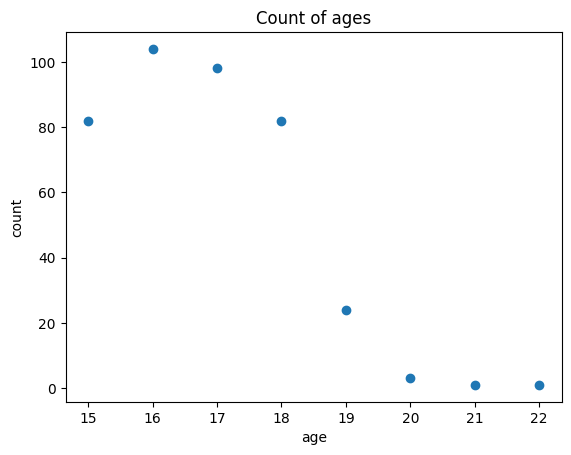

In [23]:
counts = list(age_counts.values())

plt.scatter(unique_ages, counts)

plt.xlabel('age')

plt.ylabel('count')

plt.title('Count of ages')

plt.show()

Notes: Most of the data is for students ages 15-19 with only 4 students being 20 and over. These could be considered outliers and I should drop them. 

In [24]:
mask = df['age'] < 20 

student_df = df[mask]

In [25]:
student_df = df[mask]

In [26]:
student_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [27]:
#Check to make sure data is for students under 20 years of age. 
student_df['age'].max()

19

In [28]:
student_df = student_df.drop('school', axis=1)

Data Clean and Data Manipulation

#Change columns G1,G2,G3 these represent grades for three trimesters, I need to change these since they are on a scale of 0-20. I want them to reflect grades in USA 0-100. 

In [29]:
#Change grade scale from 0-20 to 0-100 by multiplying each element in G1,G2,G3 by 5 since 20 is 1/5 of 100.
cols_to_multiply = ['G1','G2','G3']
student_df[cols_to_multiply] = student_df[cols_to_multiply] * 5

In [30]:
#Check to see if columns are now on scale of 0-100
student_df[cols_to_multiply].head(20)

G1  G2  G3
0   25  30  30
1   25  25  30
2   35  40  50
3   75  70  75
4   30  50  50
5   75  75  75
6   60  60  55
7   30  25  30
8   80  90  95
9   70  75  75
10  50  40  45
11  50  60  60
12  70  70  70
13  50  50  55
14  70  80  80
15  70  70  70
16  65  70  70
17  40  50  50
18  30  25  25
19  40  50  50

#Create an absence % feature using the 'absences' column. I did an internet search which showed that in portugal students attend for 180 days. 

In [31]:
#Most number of school days missed. 
student_df['absences'].max()

75

In [32]:
student_df['absences'].value_counts()

absences
0     114
2      65
4      52
6      31
8      22
10     17
14     12
12     12
7       7
3       7
16      6
5       5
18      5
20      4
9       3
13      3
15      3
22      3
1       3
11      2
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64

In [33]:
student_df['absences'].describe()

count    390.000000
mean       5.694872
std        8.026097
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [34]:
#Least number of school days missed. 
student_df['absences'].min()

0

In [35]:
#Creating feature/column 'abscense %' by dividing the elements in 'absence' by 180 which is the total number of school days. 

student_df['absences %'] = student_df['absences']/180

In [36]:
#Have to multiply by 100 to get percentage 
student_df['absences %'] = student_df['absences %'] *100

In [37]:
student_df['absences %'].head()

0    3.333333
1    2.222222
2    5.555556
3    1.111111
4    2.222222
Name: absences %, dtype: float64

EDA with Ydata

In [38]:
profile = ProfileReport(student_df, title="Profiling Report")

In [39]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'teacher'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
student_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'absences %'],
      dtype='object')

In [42]:
student_df['G1'].mean()

54.51282051282051

In [43]:
student_df['G1'].median()

55.0

In [44]:
student_df['G2'].mean()

53.52564102564103

In [45]:
student_df['G2'].median()

55.0

In [46]:
student_df['G3'].mean()

52.01282051282051

In [47]:
student_df['G3'].median()

55.0

Text(0.5, 0, 'semester 1 grades')

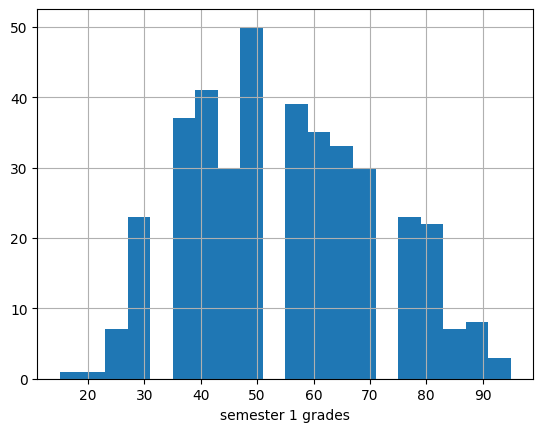

In [48]:
#Plot values for failures
#Use for any/all columns

ax = student_df['G1'].hist(bins=20)

ax.set_xlabel('semester 1 grades')


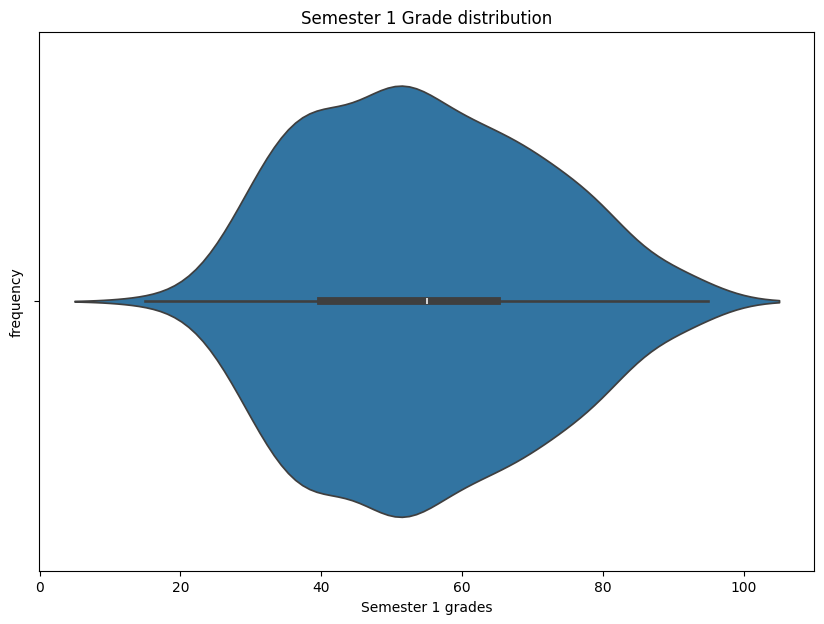

In [49]:
fig, ax = plt.subplots(figsize=(10,7))

sns.violinplot(x='G1', data=student_df, ax=ax)

#Lable axis

ax.set_xlabel('Semester 1 grades')
ax.set_ylabel('frequency')
ax.set_title('Semester 1 Grade distribution')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


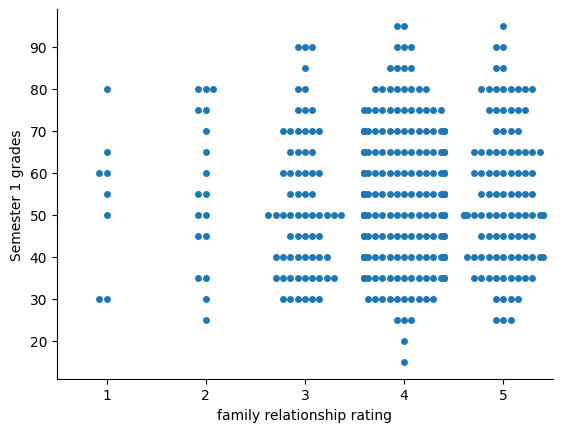

In [50]:
sns.swarmplot(data=student_df,
            x='famrel',
            y='G1')
plt.xlabel('family relationship rating')
plt.ylabel('Semester 1 grades')
sns.despine()

plt.show()

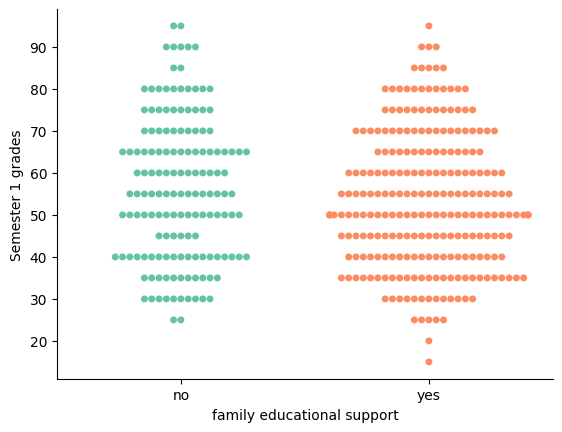

In [94]:
sns.swarmplot(data=student_df,
            x='famsup',
            y='G1',hue='famsup', palette='Set2')
plt.xlabel('family educational support')
plt.ylabel('Semester 1 grades')
sns.despine()

plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


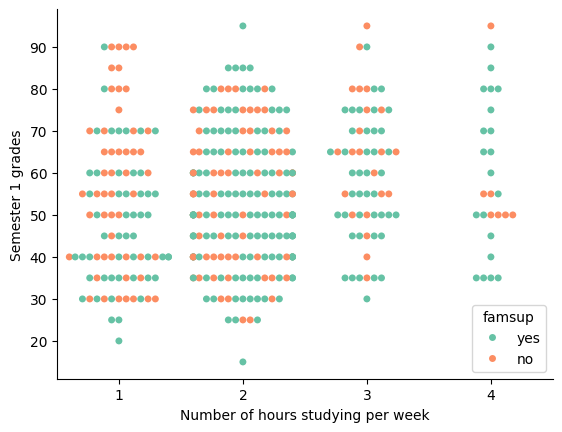

In [96]:
sns.swarmplot(data=student_df,
            x='studytime',
            y='G1',hue='famsup', palette='Set2')
plt.xlabel('Number of hours studying per week')
plt.ylabel('Semester 1 grades')
sns.despine()

plt.show()

This swarmplot shows that students who recieve family educational support tend to study more hours per week as seen by the green dots. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


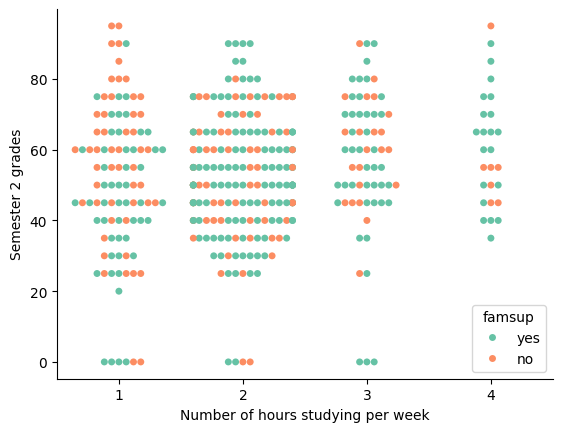

In [97]:
sns.swarmplot(data=student_df,
            x='studytime',
            y='G2',hue='famsup', palette='Set2')
plt.xlabel('Number of hours studying per week')
plt.ylabel('Semester 2 grades')
sns.despine()

plt.show()

In [122]:
student_famsup_nofailures = student_df[(student_df['famsup'] =='yes') & (student_df['failures']<1)]

print(len(student_famsup_nofailures))

197


In [110]:
student_famsup_nofailures.head()

sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  absences %
F    15   R        GT3      T        2     2     at_home   other     reputation  mother    1           1          0         yes        yes     yes   yes         yes      yes     no        no        4       3         1      1     1     2       8         70  65  65  4.444444      1
M    15   U        GT3      T        2     2     other     other     home        mother    1           1          0         no         yes     yes   no          yes      yes     yes       no        4       2         2      1     2     5       2         60  60  55  1.111111      1
                                                 services  services  home        father    1           4          0         no         yes     yes   yes         y

In [116]:
student_famsup_failures = student_df[(student_df['famsup'] =='yes') & (student_df['failures']>=1)]

print(len(student_famsup_failures))

43


In [121]:
fail_rate_with_famsup_yes = len(student_famsup_nofailures)/(len(student_famsup_nofailures) + len(student_famsup_failures)) *100

print(fail_rate_with_famsup_yes)

82.08333333333333 %


Observations: Roughly 82% of students who had family support did not fail a single class. 

In [123]:
student_nofamsup_nofailures = student_df[(student_df['famsup'] =='no') & (student_df['failures']<1)]

print(len(student_nofamsup_nofailures))

114


In [124]:
student_nofamsup_failures = student_df[(student_df['famsup'] =='no') & (student_df['failures']>=1)]

print(len(student_nofamsup_failures))

36


In [125]:
fail_rate_with_famsup_no = len(student_nofamsup_nofailures)/(len(student_nofamsup_failures) + len(student_nofamsup_nofailures)) *100

print(fail_rate_with_famsup_no)

76.0 %


In [143]:
print(len(student_df[student_df['failures']>=1]))

79


In [145]:
print(len(student_df['failures']))

390


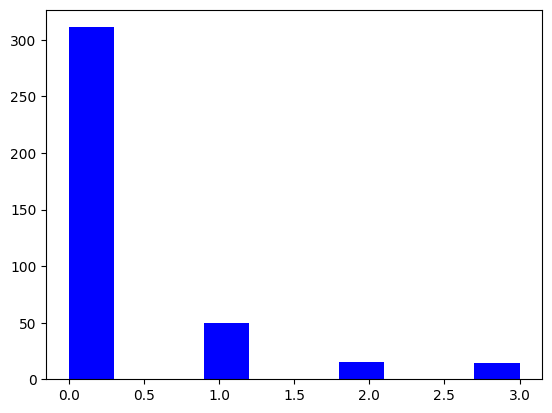

In [138]:
plt.hist(student_df['failures'], bins=10, color='blue')



plt.show()

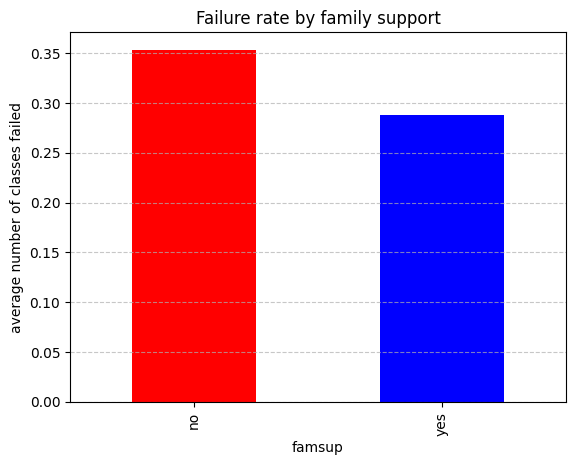

In [170]:
grouped_data = student_df.groupby('famsup')['failures'].mean()

grouped_data.plot(kind='bar', color=['red','blue'])


plt.title('Failure rate by family support')

plt.ylabel('average number of classes failed')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

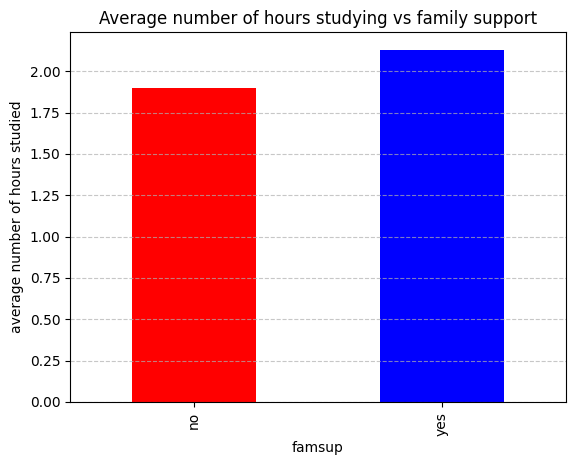

In [169]:
grouped_data = student_df.groupby('famsup')['studytime'].mean()

grouped_data.plot(kind='bar', color=['red','blue'])


plt.title('Average number of hours studying vs family support')

plt.ylabel('average number of hours studied')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

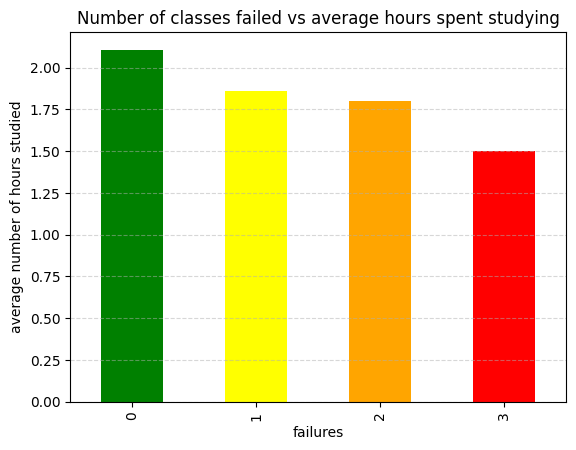

In [172]:
grouped_data = student_df.groupby('failures')['studytime'].mean()

grouped_data.plot(kind='bar', color=['green','yellow','orange','red'])


plt.title('Number of classes failed vs average hours spent studying')

plt.ylabel('average number of hours studied')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [99]:
student_df['failures'].value_counts()

failures
0    311
1     50
2     15
3     14
Name: count, dtype: int64

Visualizing how average hours of study per week affects failure of classes. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


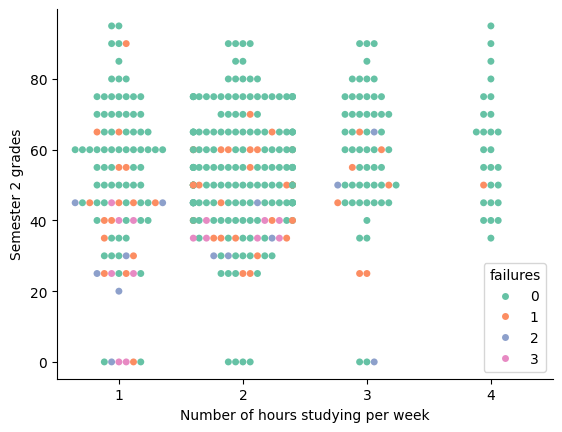

In [100]:
sns.swarmplot(data=student_df,
            x='studytime',
            y='G2',hue='failures', palette='Set2')
plt.xlabel('Number of hours studying per week')
plt.ylabel('Semester 2 grades')
sns.despine()

plt.show()

Text(0.5, 0, 'semester 2 grades')

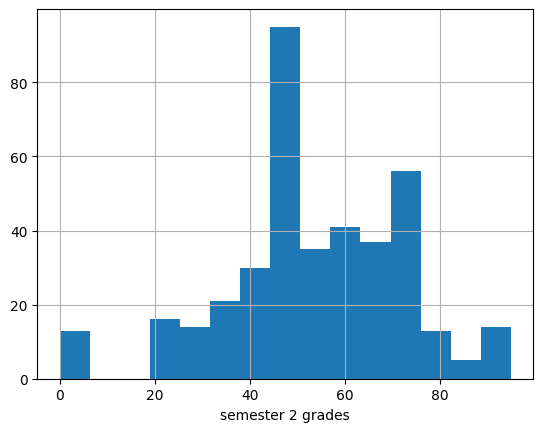

In [51]:
#Plot values for failures
#Use for any/all columns

ax = student_df['G2'].hist(bins=15)

ax.set_xlabel('semester 2 grades')

Text(0.5, 0, 'semester 3 grades')

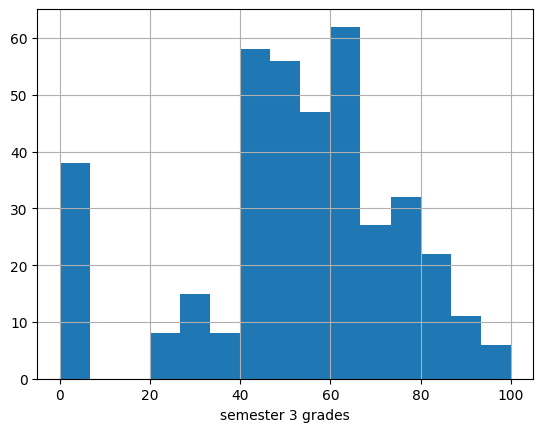

In [52]:
#Plot values for failures
#Use for any/all columns

ax = student_df['G3'].hist(bins=15)

ax.set_xlabel('semester 3 grades')

Text(0.5, 0, 'family relationship')

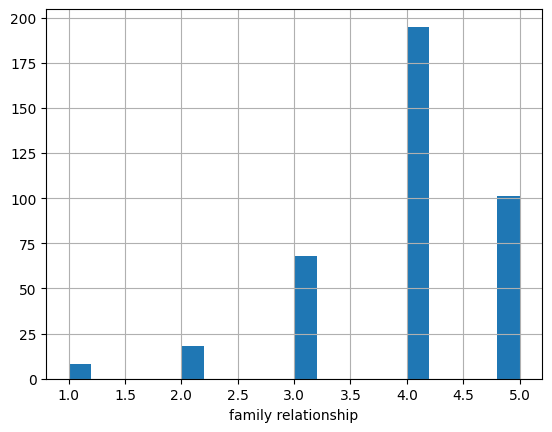

In [53]:
ax = student_df['famrel'].hist(bins=20)

ax.set_xlabel('family relationship')

In [54]:
student_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'absences %'],
      dtype='object')

Text(0.5, 0, 'family support')

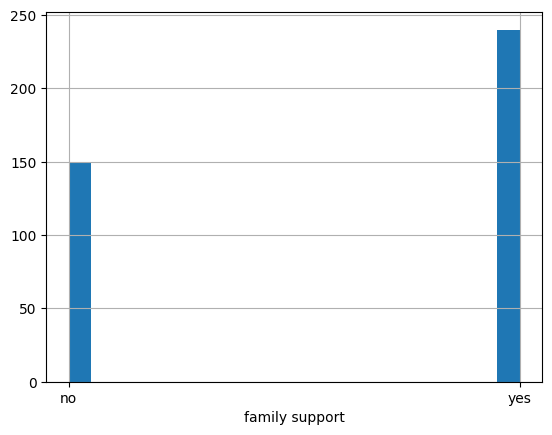

In [55]:
ax = student_df['famsup'].hist(bins=20)

ax.set_xlabel('family support')

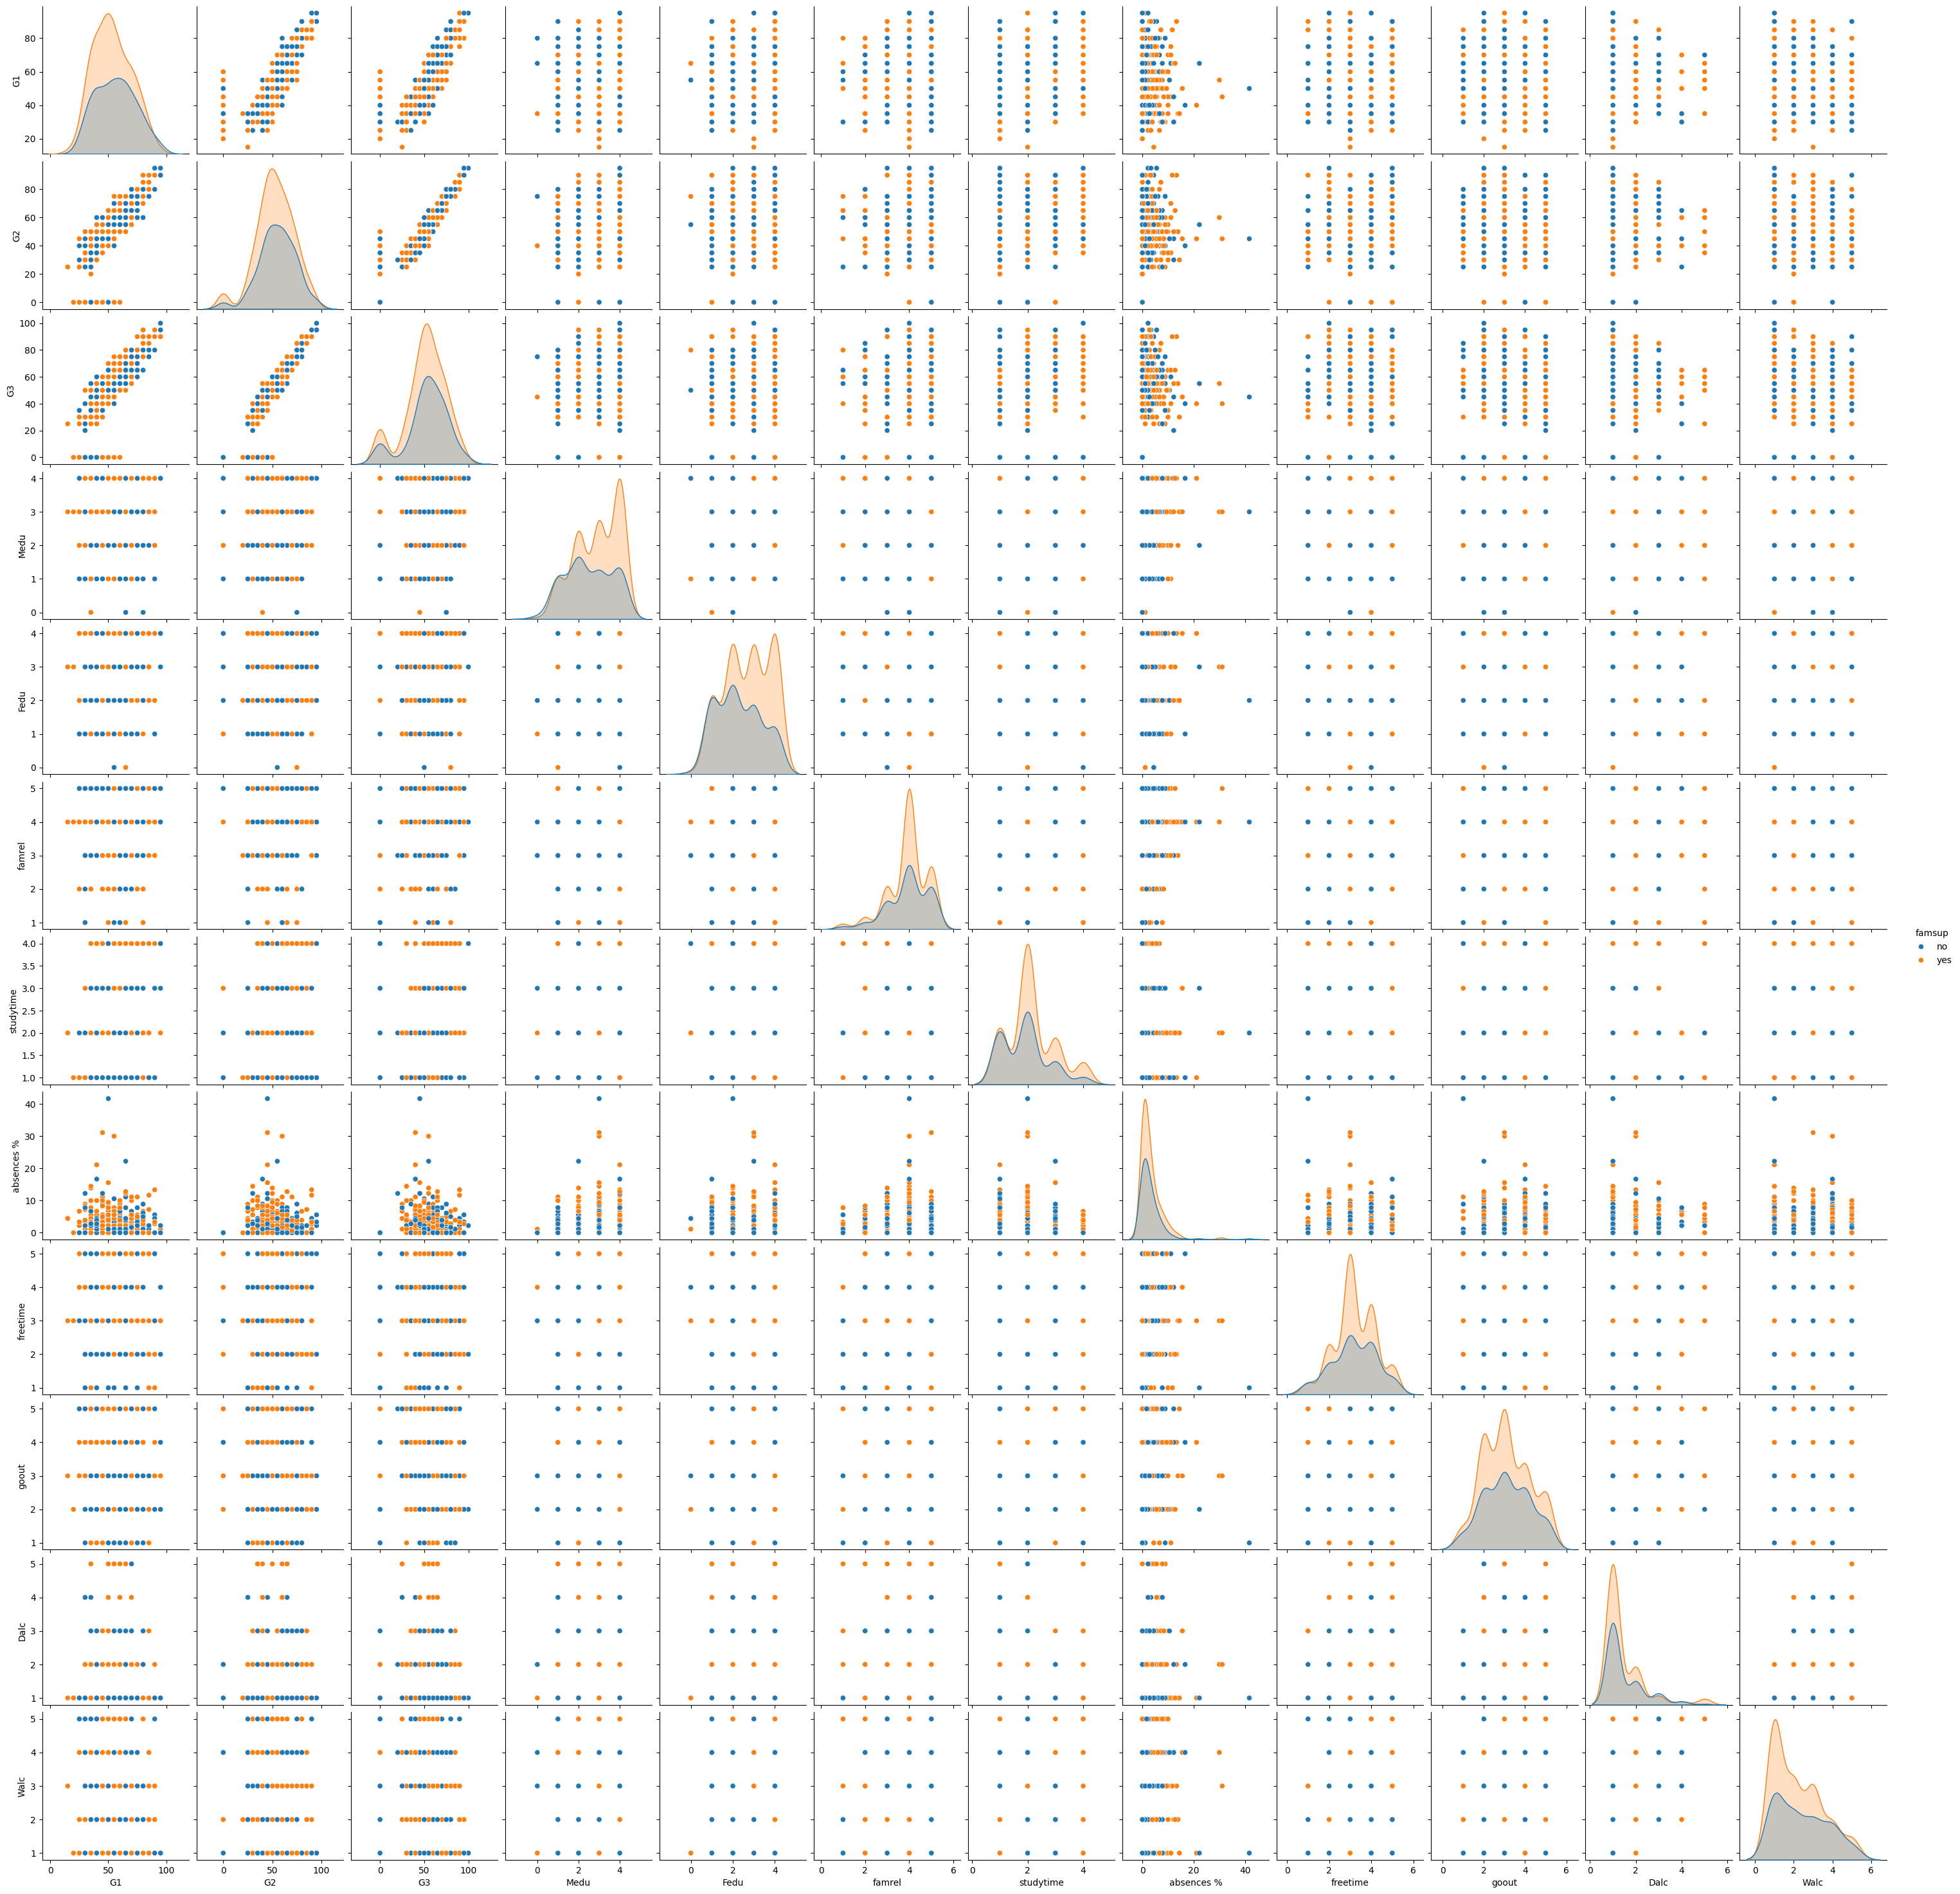

In [92]:
# Pair plot for grades and family-related features
sns.pairplot(student_df[['G1', 'G2', 'G3', 'famsize', 'Medu', 'Fedu','famsup','famrel','studytime','absences %','sex','romantic','freetime','goout','Dalc','Walc']], hue='famsup')
plt.show()

In [57]:
Mean_grade = student_df[['G1','G2','G3']].mean()

print(Mean_grade)

G1    54.512821
G2    53.525641
G3    52.012821
dtype: float64


In [58]:
student_df['famrel'].value_counts()

famrel
4    195
5    101
3     68
2     18
1      8
Name: count, dtype: int64

In [86]:
# Example: Summary statistics of grades based on family relationship
summary_rel = student_df.groupby('famrel')[['G1', 'G2', 'G3']].mean()
print(summary_rel)

               G1         G2         G3
famrel                                 
1       53.750000  57.500000  53.125000
2       56.111111  56.111111  49.444444
3       52.794118  52.794118  50.220588
4       54.794872  53.384615  51.794872
5       54.900990  53.514851  54.009901


In [85]:
# Example: Summary statistics of grades based on family relationship
summary_famsup = student_df.groupby('famsup')[['G1', 'G2', 'G3']].mean()
print(summary_famsup)

               G1         G2         G3
famsup                                 
no      56.333333  54.933333  53.166667
yes     53.375000  52.645833  51.291667


In [83]:
student_df['studytime'].value_counts()

studytime
2    197
1    102
3     64
4     27
Name: count, dtype: int64

In [88]:
student_study = student_df.groupby('studytime')[['G1', 'G2', 'G3']].mean()

print(student_study)

                  G1         G2         G3
studytime                                 
1          52.107843  51.225490  50.098039
2          53.299492  52.563452  50.888325
3          60.000000  57.343750  56.718750
4          59.444444  60.185185  56.296296


Struggled to get create a correlation matrix since many of the variables were categorical. Had to do some searching on the internet to discover how to create a correlation matrix with categorical variables.

In [62]:

#This failed because not all values were numeric
student_df.corr()

ValueError: could not convert string to float: 'F'

In [63]:
# One-Hot Encode Categorical Variables
# This will create new columns for each category in categorical variables
Student_df_encoded = pd.get_dummies(student_df)

#Calculate the Correlation Matrix
correlation_matrix = Student_df_encoded.corr()

In [64]:
print(correlation_matrix)

                        age      Medu      Fedu  traveltime  studytime  \
age                1.000000 -0.168648 -0.136437    0.092583   0.022115   
Medu              -0.168648  1.000000  0.626633   -0.178439   0.058727   
Fedu              -0.136437  0.626633  1.000000   -0.164854  -0.018403   
traveltime         0.092583 -0.178439 -0.164854    1.000000  -0.110501   
studytime          0.022115  0.058727 -0.018403   -0.110501   1.000000   
failures           0.165576 -0.239068 -0.231994    0.107861  -0.167732   
famrel             0.008247 -0.001877  0.011617   -0.011562   0.048376   
freetime          -0.038687  0.038197  0.001588   -0.008738  -0.134495   
goout              0.113517  0.065113  0.050105    0.032761  -0.059504   
Dalc               0.069404  0.032605  0.025845    0.158468  -0.185885   
Walc               0.097035 -0.039747 -0.003080    0.144766  -0.250863   
health            -0.049042 -0.046879  0.008038    0.006922  -0.079271   
absences           0.178373  0.101275 

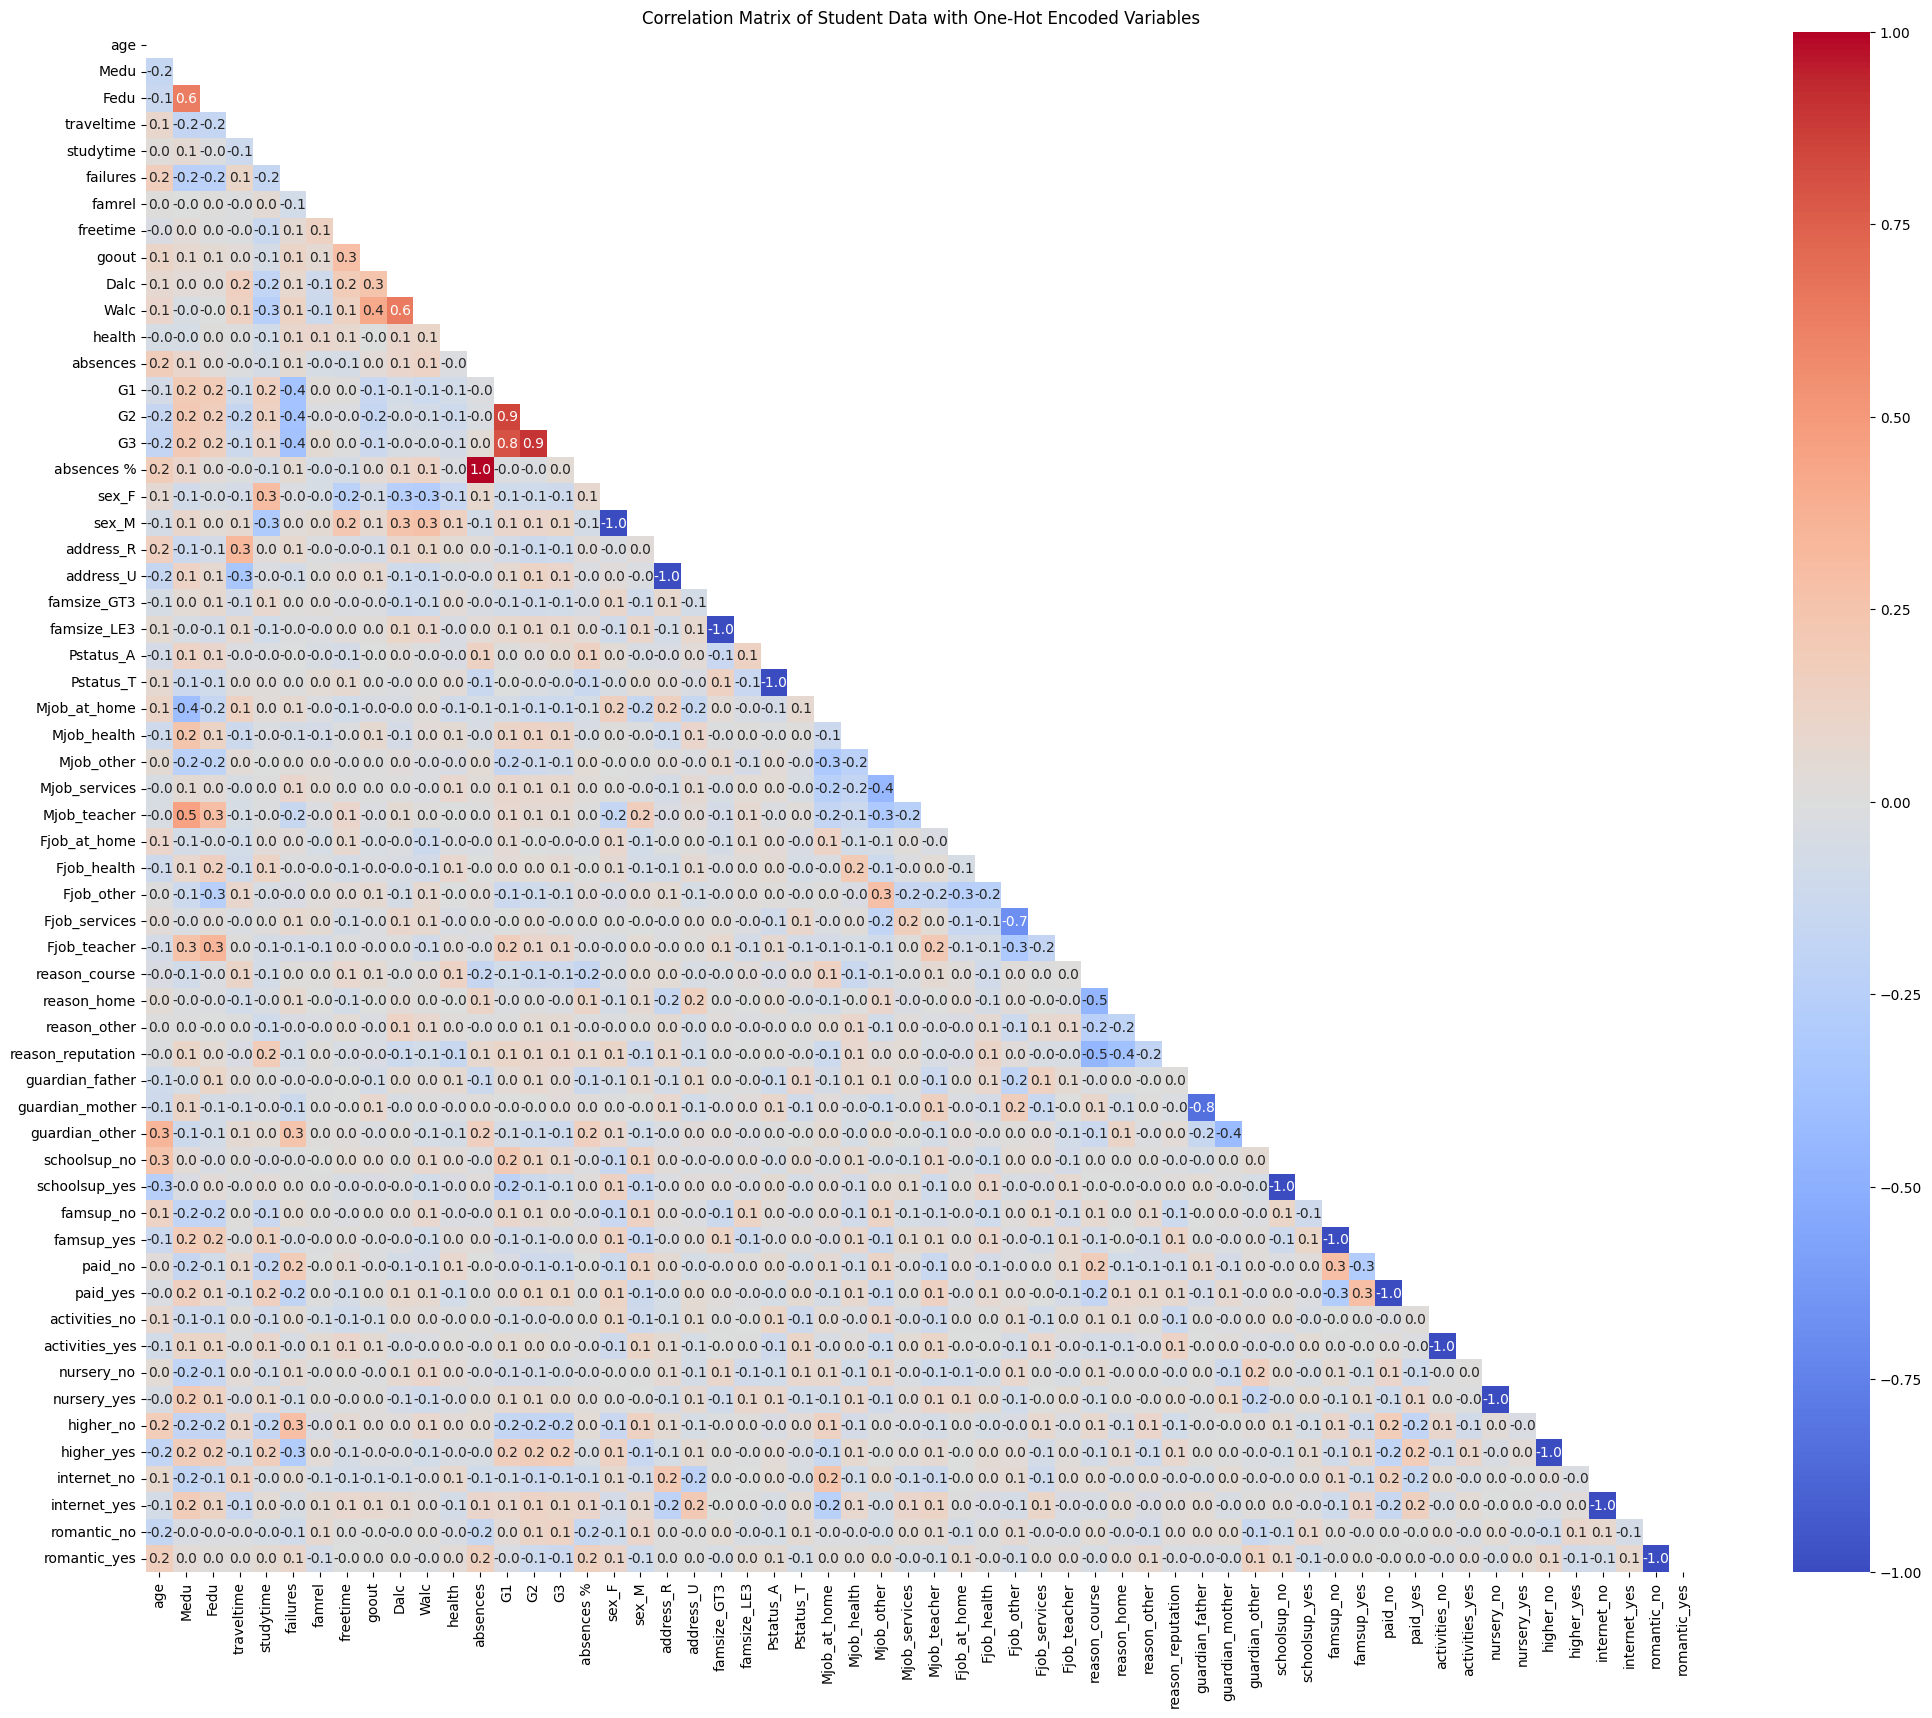

In [65]:

#Plot the Correlation Matrix
plt.figure(figsize=(25, 20))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".1f", mask=mask)
plt.title('Correlation Matrix of Student Data with One-Hot Encoded Variables')
plt.show()

In [72]:
correlation_matrix.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'absences %', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

The correlation matrix is too cluttered, I need to reduce noise and focus on just a few features related to family and grades. 

In [75]:
#Medu
#Fedu
#studytime
#famrel
#famsize_GT3
#famsize_LE3
#freetime
#goout
#Dalc
#Walc
#G1
#G2
#G3
#romantic_yes
#romantic_no
Student_fam_sup = correlation_matrix[['Medu','Fedu','studytime','famrel','famsize_GT3','famsize_LE3','freetime','goout','Dalc','Walc','G1','G2','G3','romantic_yes','romantic_no','famsup_yes','famsup_no']]

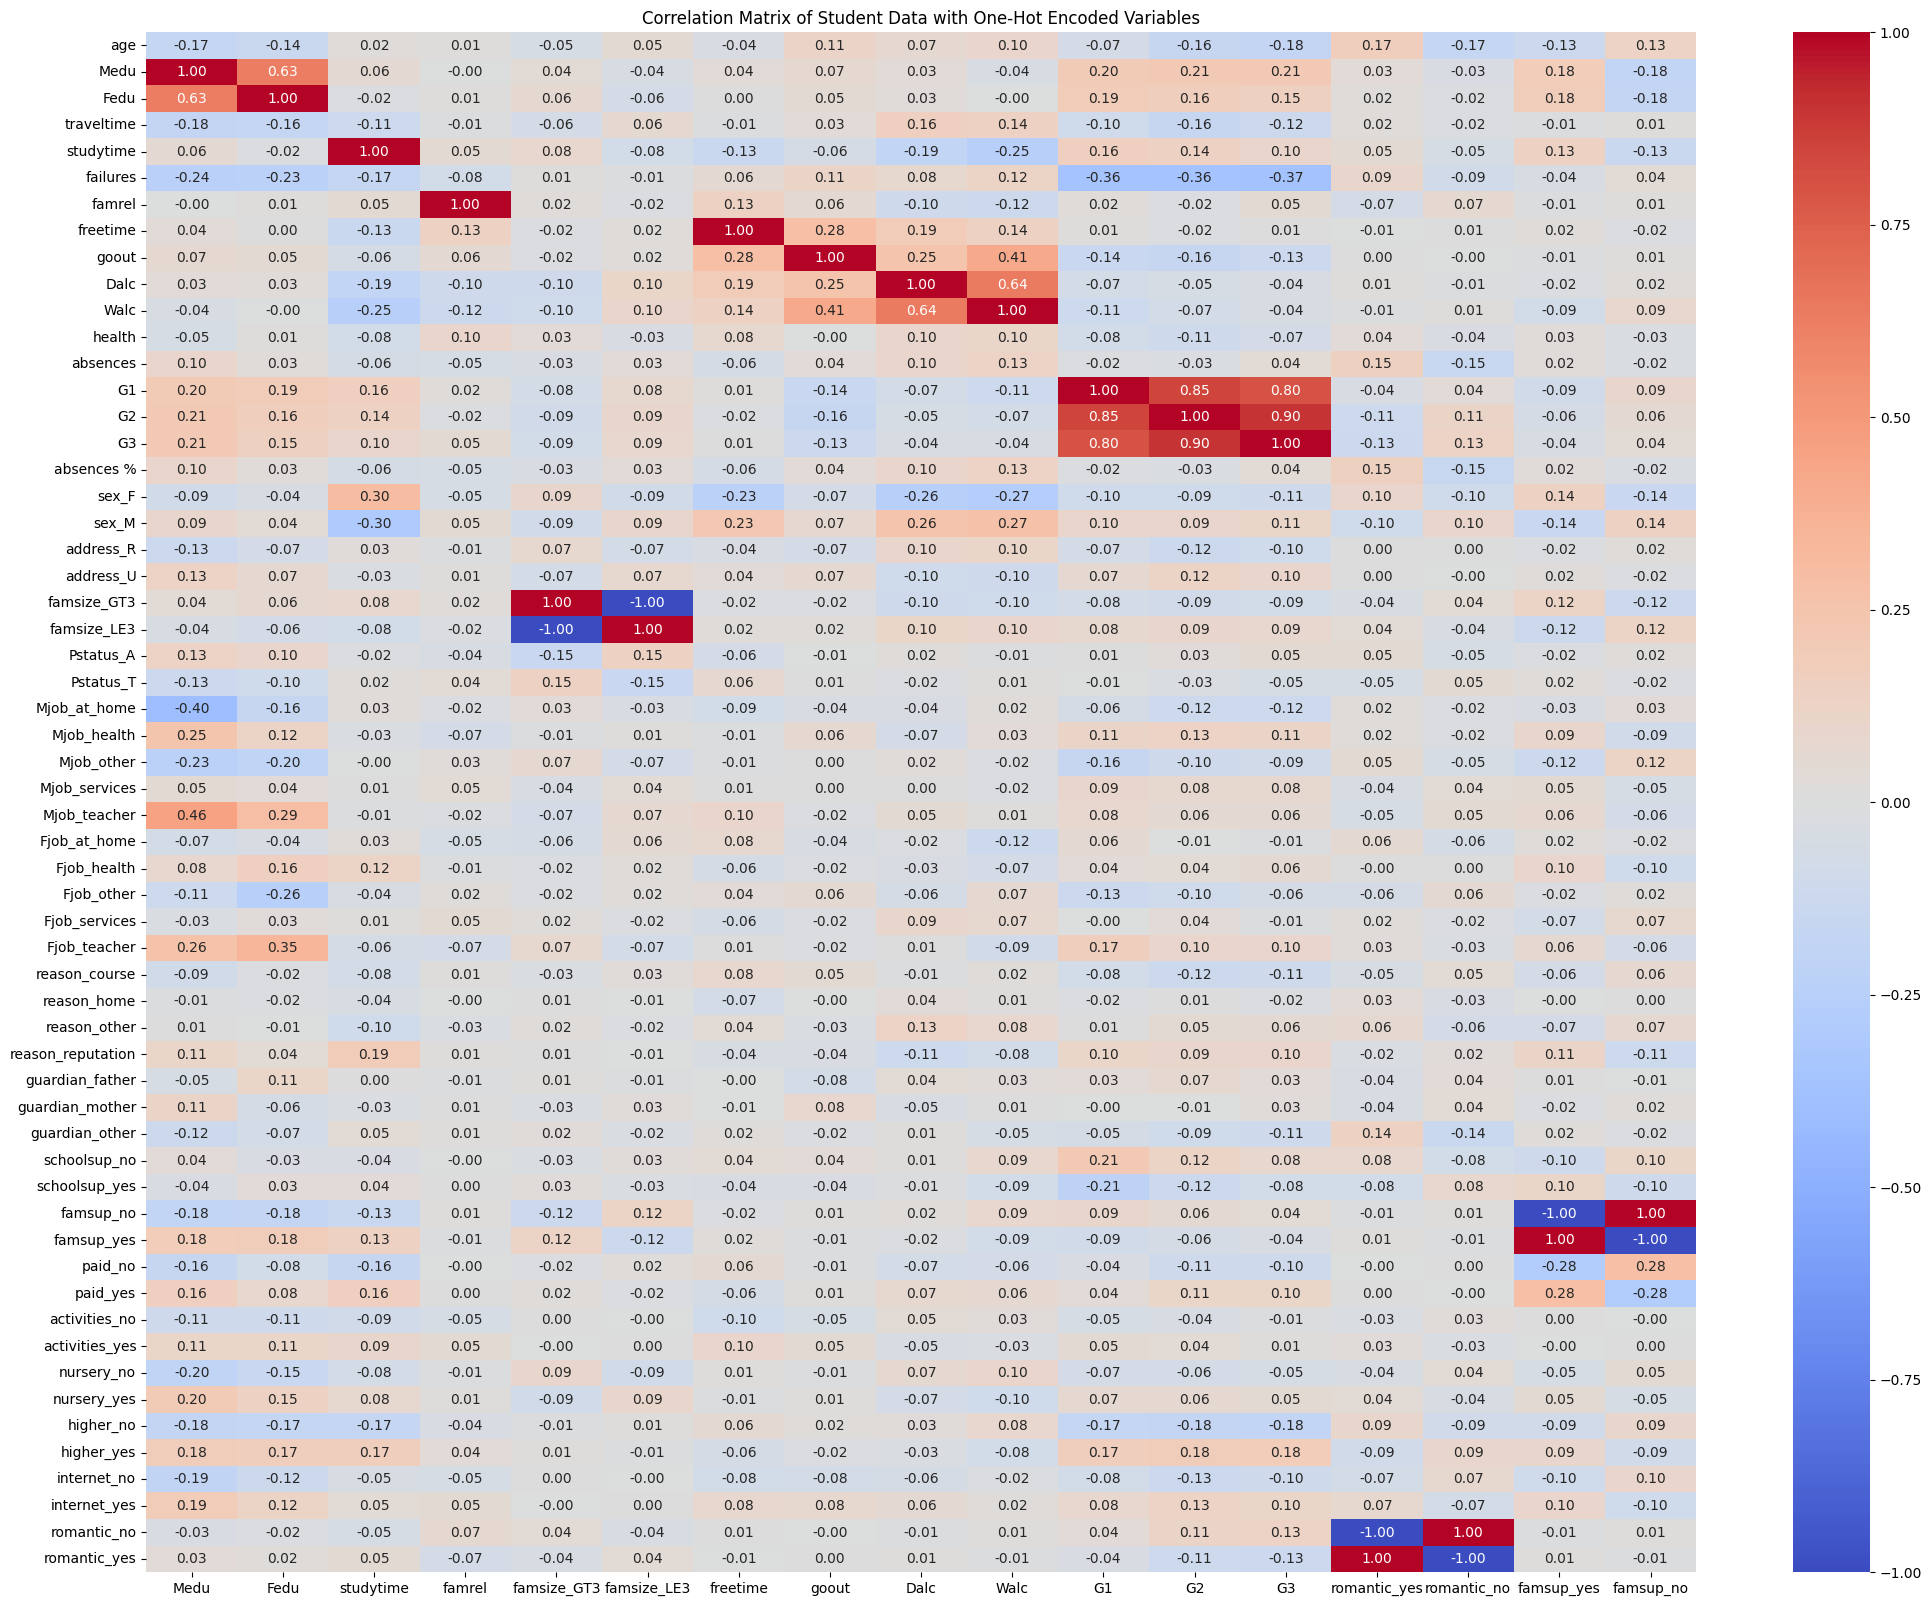

In [78]:
#Plot the Correlation Matrix
plt.figure(figsize=(25, 20))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(Student_fam_sup, dtype=bool))

sns.heatmap(Student_fam_sup, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Narrowed down Correlation Matrix of Student Data with One-Hot Encoded Variables')
plt.show()

Observations:
High correlation between grades and Mother and Father educational level. There is also a higher correlation between parents educational level and family support. 

Conclusions based on EDA:

Basded on observation made during EDA I can conclude that there is a strong association between family support and better student performance. Students who recived family support had lower class failiure rates. Although the correlation matrix does not show a strong correlation between family support and grades, it did show a strong correlation between studytime and higher grades ranging between 10-16% based on the semester. Family support showed a strong postive correlation with studytime at 13% for students which in turn showed a strong correlation with higher grades.

The strongest correlation was found between father and mother level of education and higher grades ranging from 15-21%. I cannot conclude that having parents that have a higher level of education contributes to higher grades because of support recieved from parents (nurture) or perhaps because of intelligence that might be inherited(nature). This would merit further investigation.  